<a href="https://colab.research.google.com/github/reue-lly/Predictive-Analytics-using-Machine-Learning/blob/main/Activity-2/Activity_2_Training_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Pornobe, Reuel Christian
**Section** | CPE31S3
**Date Performed**: | August 18, 2025
**Date Submitted**: | August 18, 2025
**Instructor**: | Engr. Nhel Barton James Matira

<hr>

## 1. Objectives

This activity aims to:
* Perform regression analysis using linear regression and polynomial regression; and
* Solve classification problem using logistic regression.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Demonstrate how to use Python to predic outcome using linear and polynomial regression;
* Demonstrate how to use single and multiple features to predict the outcome using linear regression;
* Demonstrate how to train and predict classification model using logistic regression;
* Evaluate and visualize the performance of different regression models.

## 3. Procedures and Outputs

### 3.1 Setup

These are configurations for running on your local machine. No problem with running it on your colab. This project requires Python 3.7 or above:

In [2]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/training_linear_models` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 3.2 Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* or the *intercept term*.

#### 3.2.1 The Normal Equation

In [6]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

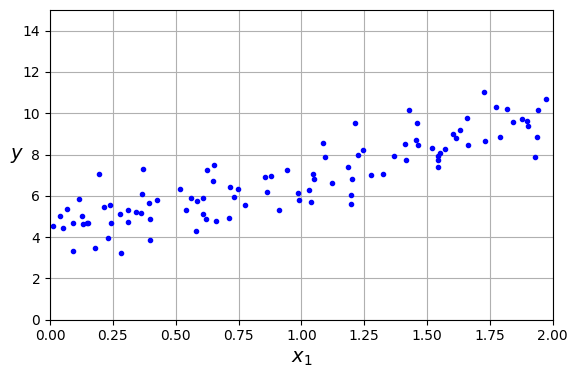

In [7]:
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [8]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [9]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [10]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

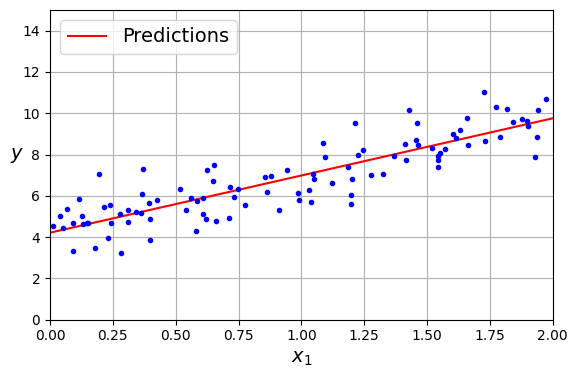

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [13]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

The pseudoinverse is computed using a standard matrix factorization technique called *Singular Value Decomposition*. What does SVD do? Quickly research and answer.





> Single Value Decomposition is showing all the modifications done in a matrix. It shows the direction of the matrix and if it is short and long. It basically strips the matrix to its fundamental elements.



This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [15]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

You have multiple methods used to implement the for linear regression. Provide a comparison between the *Singular Value Decomposition* and the Normal Equation Computation. Which is more efficient?



> Normal Equation Computation is faster but the data nad the features must be well-behaved. Singular Value Decomposition is slower but works with difficult data behaviors. Normal Equation Computation would be efficient in well-behaved data but real-life data is not always ideal that is why Singular Value Decomposition is generally better.



### 3.2 Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. Generally, the idea is to tweak parameters iteratively to minimize a cost funtion.

#### 3.2.1 Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost func tion with regards to each model parameter θj. In other words, you need to calculate
how much the cost function will change if you change θj
just a little bit. This is called a partial derivative. It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions).

In [16]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

The trained model parameters:

In [17]:
theta

array([[4.21509616],
       [2.77011339]])

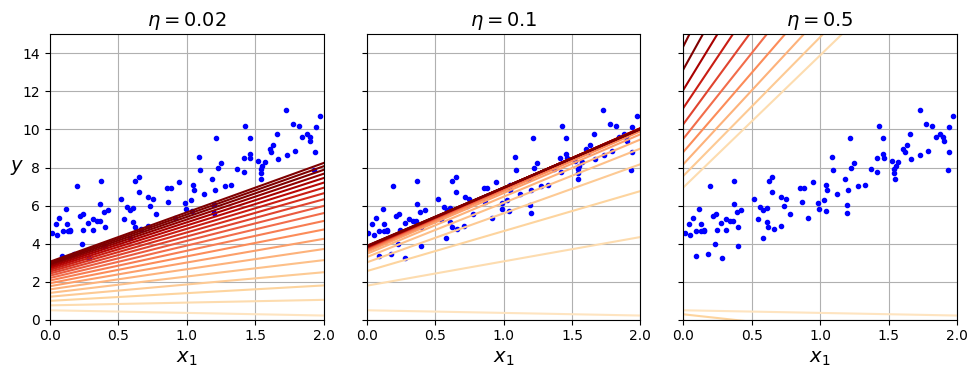

In [18]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()

Compare the learning rate provided and shown in the graph above. Provide a quick discussion on how learning rate affects model learning based on the given figure.



> When the learning rate is small, 0.02, it takes too long to reach the right learning of the model. On the other hand, if it is too big, it might skip the right answers. Therefore, learning rate must be balanced or else the model will learn too slow or it might skip the answers.



#### 3.2.2 Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.)

In [19]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

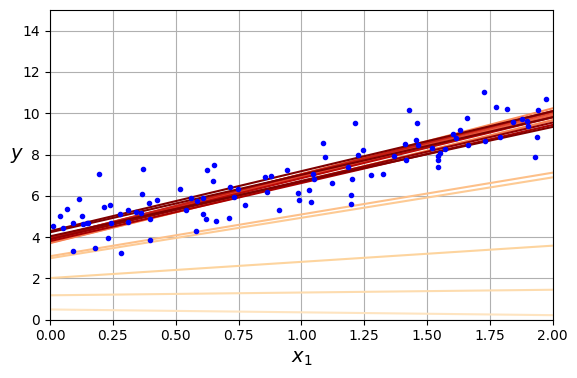

In [20]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

In [21]:
theta

array([[4.21076011],
       [2.74856079]])

In [22]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

Compare the Stochastic Gradient Descent used in this section to the gradient descent algorithm used previously. What are the benefits to using Stochastic Gradient Descent (SGD)?



> Stochastic Gradient Descent only picks random training data and adjusts the parameters of the model based on that. On the other hand, Batch Gradient Descent uses all the training data to adjust the parameter of the model. Stochastic Gradient Descent is useful when we are training a model in a huge dataset while Batch Gradient Descent is useful for small and medium dataset due to its precision.



#### 3.2.3 Mini-batch gradient descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

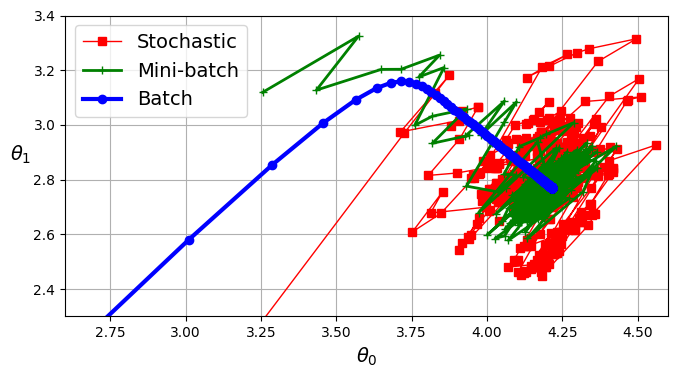

In [24]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
save_fig("gradient_descent_paths_plot")
plt.show()

Provide a comparison of the 3 gradient descent algorithms included in this section. The comparison must provide an analysis based on different factors such as execution time (among others).



> Batch Gradient Descent has a clean and refined way of changing or alternating the parameters to reach the right answers. The chart also shows that Batch Gradient Descent has a lot of instances to reach the right answers. On the other hand, Stochastic Gradient Descent Algorithm jumps all over the place and it zigzags to the right answers. This is a good illustration on why Stochastic Gradient Descent Algorithm is good for big dataset since it jumps immediately near the right answers however it is less precise than Batch Gradient Descent. Lastly, Mini-batch Gradient is a combination of BGD and SGD. It jumps quickly to the right answers while having a better precision the SGD.



### 3.3 Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [25]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

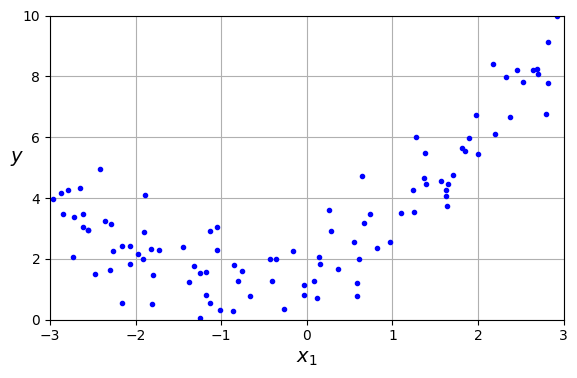

In [26]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

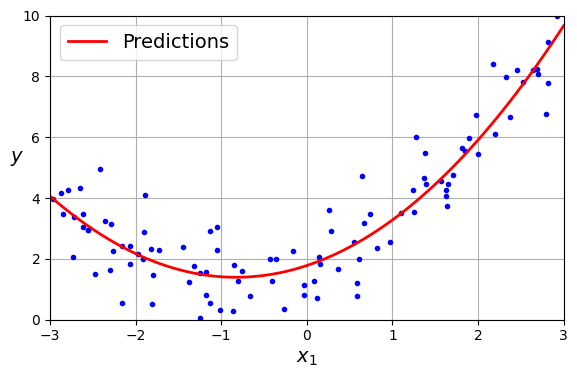

In [30]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

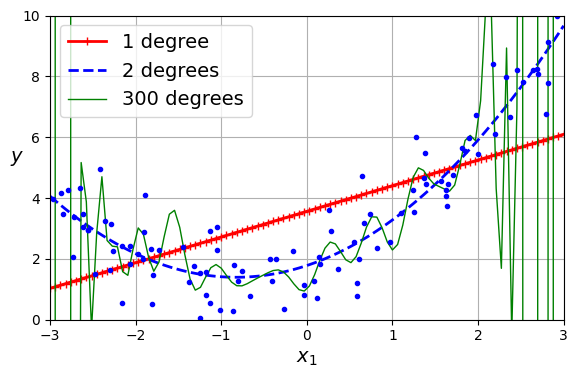

In [31]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

Based on this example, how is Polynomial Regression able to find relationships between features? Is this something simple Linear Regression is unable to do?

What do we achieve in the figure above? Explain the result of the comparison.



> Polynomial Regression find relationships between features by adding degrees. Simple Linear Regression only uses one degree therefore it cannot do the same way. In the figure above, one degree is a simple linear regression making it look like an underfitting model. While a very complex model with a lot of degrees is not generalized well to predict data. A well-blanced model with the right degree will generalized the data well which in turn can predict the right answers.



### 3.4 Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression.

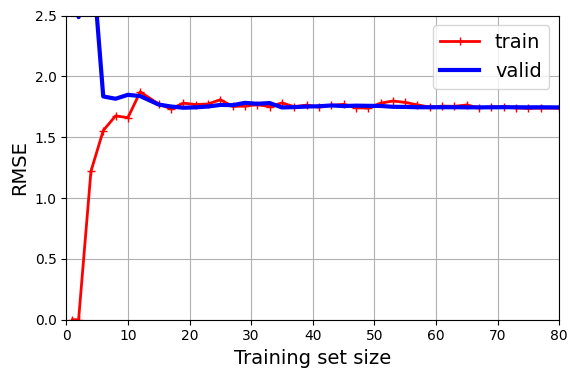

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")

plt.show()

This deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit
them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.


Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

What are these learning curves indicating? Is the model overfitting or underfitting? Explain why.



> The Model is Overfitting since the training and validation is so closed to each other. It shows that the model memorized the dataset too well that it became a flat plateau.


In [33]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

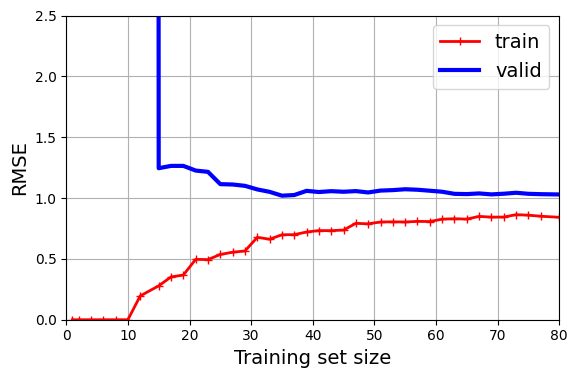

In [34]:
# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

Compare this learning curve with the one previously shown above. The major differences you must explain here are as follows:

* The learning rate
* The gap between the curves



> Compared to the earlier chart, the learning rate is slower but more relaxed and refined in going up to the optimal rmse. The gap in this chart shows that the model generalized the dataset well that it has a decent RMSE. Compared to the earlier chart, there is a gap between the training and validation meaning it is not overfitted. The gap is not too big therefore it is not also underfitting.



### 3.5 Regularized Linear Models

a good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

#### 3.5.1 Ridge Regression

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

Let's generate a very small and noisy linear dataset:

In [35]:
# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

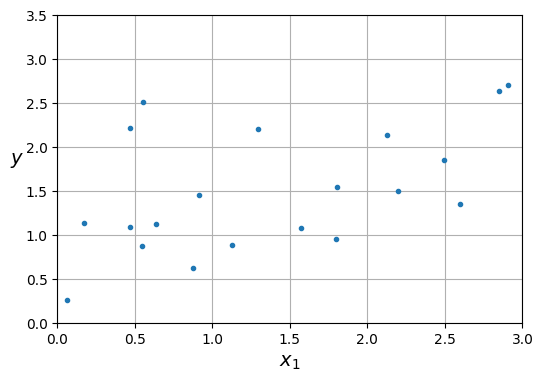

In [36]:
# extra code – a quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [37]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55325833])

As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same.

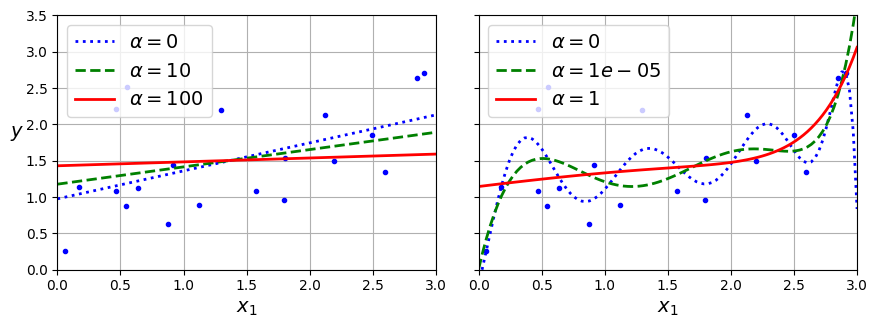

In [38]:
# extra code – this cell generates and saves Figure 4–17

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()

In [39]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [40]:
# extra code – show that we get roughly the same solution as earlier when
#              we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55326019])

In [41]:
# extra code – shows the closed form solution of Ridge regression,
#              compare with the next Ridge model's learned parameters below
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [42]:
ridge_reg.intercept_, ridge_reg.coef_  # extra code

(array([0.97896386]), array([0.38286422]))

Discuss the following:
* What is the purpose of the hyperparameter alpha as seen in the figures above?
* Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?



> The hyperparameter acts like the degree in the polynomial regression. It acts as a knob of regularization of the data. If it is too high it is prone to underfitting while if it is too low it is prone to overfitting.


> If the training error is fairly high, the model suffers underfitting since the model is not fitting well with the dataset. The model is suffering from high bias therefore you should increase the regularization parameter.




#### 3.5.2 Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

In [43]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero).

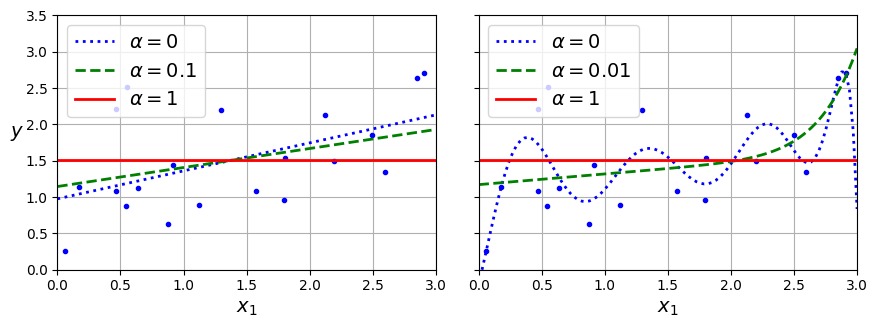

In [44]:
# extra code – this cell generates and saves Figure 4–18
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression_plot")
plt.show()

For example, the dashed line in the right plot on Figure 4-18 (with α = 10-7) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

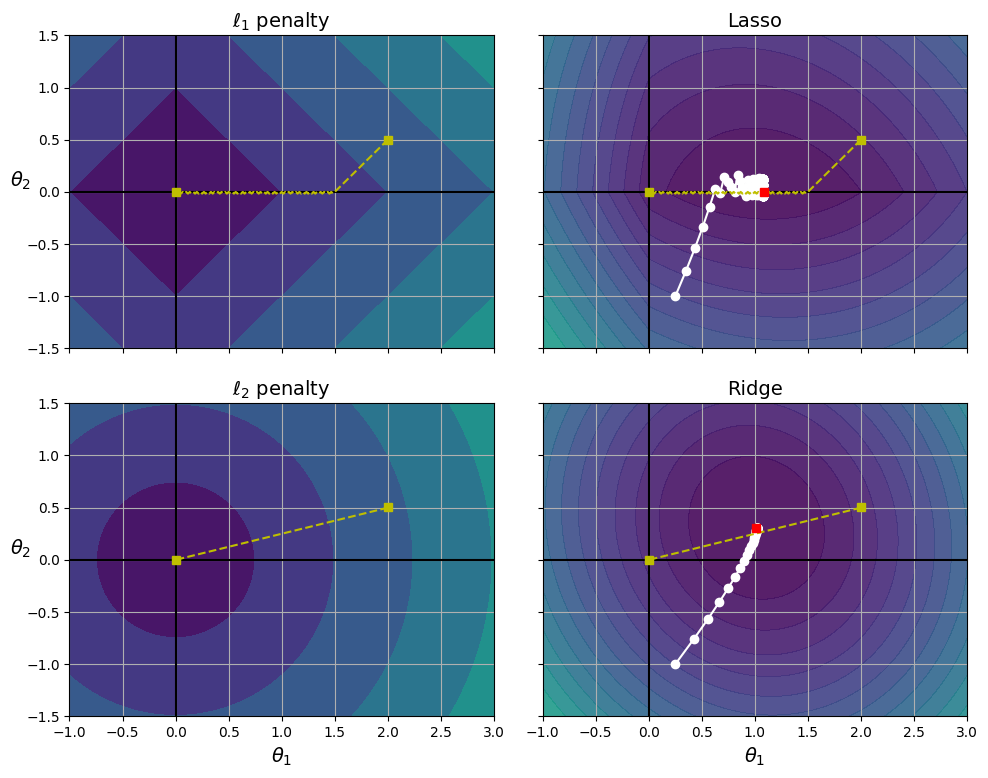

In [45]:
# extra code – this BIG cell generates and saves Figure 4–19

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("lasso_vs_ridge_plot")
plt.show()

Using the figure above, compare the Lasso Regression and the Ridge Regression. What kind of performance is observable from the graph?



> Ridge Regression regularize the data while Lasso Regression regularize the data while also eliminating unnecessary features. In the diagram, we can see that the ridge regression slowly reaches the optimal answer while Lasso Regression jumps quickly and frantically to the optimal answer.


### 3.6 Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.

Let's go back to the quadratic dataset we used earlier:

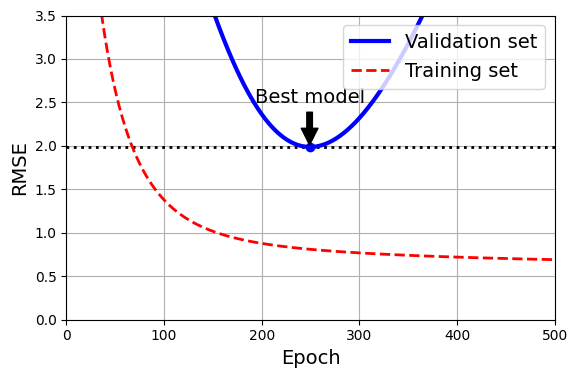

In [46]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()

Do you foresee any useful benefits of implementing early stopping?



> I think early stopping can be implemented so that the model will stop learning when it reached the target minima or slough.



### 3.7 Logistic Regression

Logistic Regression (also called Logit Regression) is com‐
monly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

#### 3.7.1 Estimating Probabilities

So how does it work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

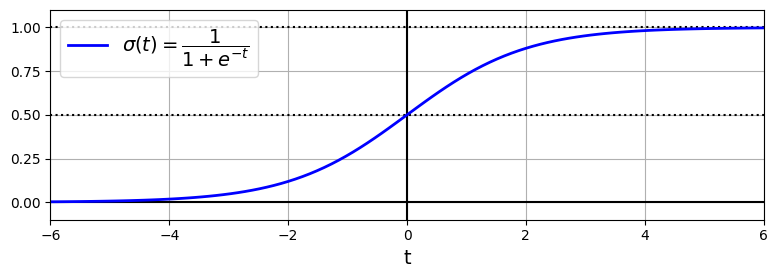

In [47]:
# extra code – generates and saves Figure 4–21

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

Given the figure above, explain how the equation might be interpreted as the figure and how this provides a logistic regression prediction?



> The graph of the equation/function shows that the common output is near 0 or near 1. Therefore, it can be used for binary classification where there can only be two answers or target based oin the features.



#### 3.7.2 Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

In [48]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [49]:
print(iris.DESCR)  # extra code – it's a bit too long

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [50]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [51]:
iris.target.head(3)  # note that the instances are not shuffled

,target
0,0
1,0
2,0


In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

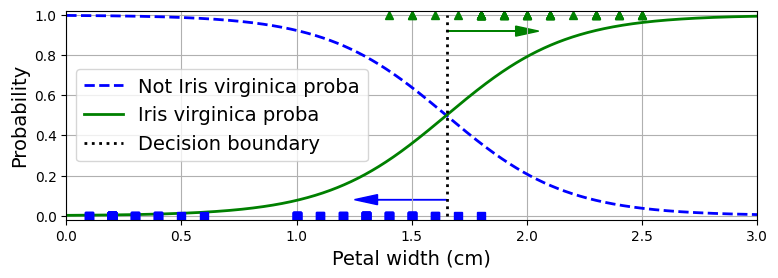

In [54]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [55]:
decision_boundary

np.float64(1.6516516516516517)

In [56]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

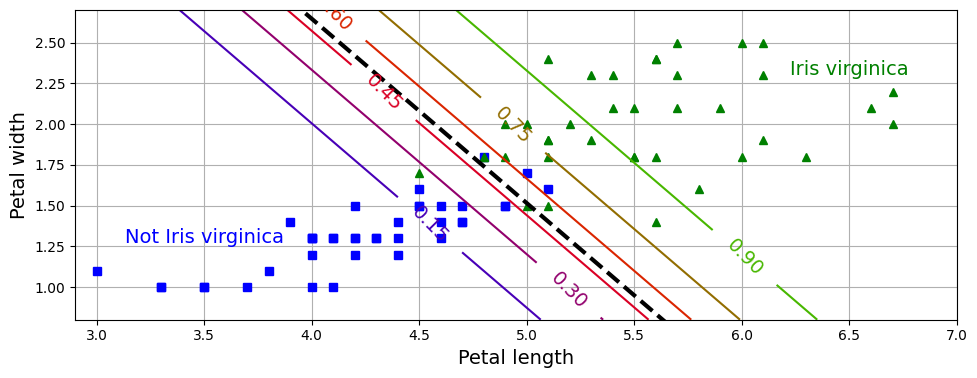

In [57]:
# extra code – this cell generates and saves Figure 4–24

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

Given the above code and the figure provided, how do l1 and l2 penalties apply to the Logistic regression model?

#### 3.7.3 Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

The idea is quite simple: when given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each
class by applying the somax function (also called the normalized exponential) to the scores. The equation to compute sk(x) should look familiar, as it is just like the equation for Linear Regression prediction

In [58]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [59]:
softmax_reg.predict([[5, 2]])

array([2])

In [60]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

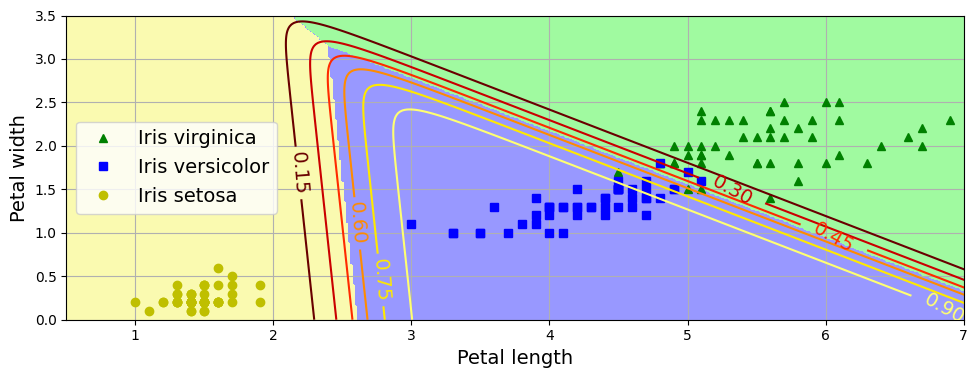

In [61]:
# extra code – this cell generates and saves Figure 4–25

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()

Given the code above as an example, how many classes can the Softmax Regression predict? Can it be used to on non-mutually exclusive classes (such as to recognize different faces in a picture)?



> A softmax regression can predict multiple classes but it becomes less precise and heavy on the computational cost. I suppose it can be used for different faces in a picture as long as the different features of a face can be detected and recorded as a readable data.



## 4. Supplementary Activity

### 4.1 Linear Regression

* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compute the correlation
* Use One-hot encoding in categorical features
* Apply feature scaling
* Perform linear regression using one independent variable only using numpy
* Perform linear regression using multiple independent variable using statsmodel
* Perform linear regression using sklearn



#### Linear Regression. Importing the dataset

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [64]:
housing = pd.read_csv('/content/drive/MyDrive/Activity_2_Training_Linear_Models/HousingData.csv')

In [65]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#### **Column name description from kaggle**

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000's

#### Determine the number of datapoints, columns and data types

In [66]:
#the number of datapoints
print("Datapoints: ", housing.shape[0])

#the column names
print("Column names: ", housing.columns.tolist())

#the data types for each column
print(housing.dtypes)

Datapoints:  506
Column names:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


#### Data Cleaning

In [67]:
# check for null values
housing.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [68]:
# delete na values
housing.dropna(inplace = True)

In [69]:
# checking again
housing.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


#### Perform descriptive statistics such as mean, median and mode

In [70]:
# the mean, median and quartiles and ranges

stats_housing = housing.describe()         #function to see the descriptive statistics of the dataset
stats_housing.loc['range'] = stats_housing.loc['max'] - stats_housing.loc['min']  #create a new column calculating the range

# Select only the 'mean','25%','median','75%', 'range
outputFields = ['mean','25%','50%','75%', 'range']
stats_housing = stats_housing.loc[outputFields]
stats_housing.rename({'50%':'median'}, inplace = True) # rename the 50% to median

stats_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
mean,3.690136,11.46066,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
25%,0.081955,0.00000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
median,0.268880,0.00000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.50000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
range,88.969880,100.00000,27.280000,1.000000,0.482000,5.219000,97.100000,10.996900,23.000000,524.000000,9.400000,394.300000,36.240000,45.000000


#### Mean, Median, Mode

In [71]:
# mean
housing.groupby('MEDV').mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,,,,,,,,,,,,,
5.0,53.136300,0.000000,18.100000,0.000000,0.693000,5.568000,100.000,1.45750,24.0,666.00,20.20,390.935,26.785000
5.6,25.046100,0.000000,18.100000,0.000000,0.693000,5.987000,100.000,1.58880,24.0,666.00,20.20,396.900,26.770000
6.3,9.916550,0.000000,18.100000,0.000000,0.693000,5.852000,77.800,1.50040,24.0,666.00,20.20,338.160,29.970000
7.0,22.964735,0.000000,22.920000,0.000000,0.651000,4.966500,99.150,1.70680,14.0,688.50,20.15,216.160,30.475000
7.2,17.448200,0.000000,18.100000,0.000000,0.689500,5.855500,99.050,1.63040,24.0,666.00,20.20,212.075,29.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44.8,0.315330,0.000000,6.200000,0.000000,0.504000,8.266000,78.300,2.89440,8.0,307.00,17.40,385.050,4.140000
45.4,0.035780,20.000000,3.330000,0.000000,0.442900,7.820000,64.500,4.69470,5.0,216.00,14.90,387.310,3.760000
46.0,0.061290,20.000000,3.330000,1.000000,0.442900,7.645000,49.700,5.21190,5.0,216.00,14.90,377.070,3.010000


In [72]:
# median
housing.groupby('MEDV').median()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,,,,,,,,,,,,,
5.0,53.136300,0.0,18.10,0.0,0.6930,5.5680,100.00,1.4575,24.0,666.0,20.20,390.935,26.785
5.6,25.046100,0.0,18.10,0.0,0.6930,5.9870,100.00,1.5888,24.0,666.0,20.20,396.900,26.770
6.3,9.916550,0.0,18.10,0.0,0.6930,5.8520,77.80,1.5004,24.0,666.0,20.20,338.160,29.970
7.0,22.964735,0.0,22.92,0.0,0.6510,4.9665,99.15,1.7068,14.0,688.5,20.15,216.160,30.475
7.2,17.448200,0.0,18.10,0.0,0.6895,5.8555,99.05,1.6304,24.0,666.0,20.20,212.075,29.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44.8,0.315330,0.0,6.20,0.0,0.5040,8.2660,78.30,2.8944,8.0,307.0,17.40,385.050,4.140
45.4,0.035780,20.0,3.33,0.0,0.4429,7.8200,64.50,4.6947,5.0,216.0,14.90,387.310,3.760
46.0,0.061290,20.0,3.33,1.0,0.4429,7.6450,49.70,5.2119,5.0,216.0,14.90,377.070,3.010


In [73]:
# mode
housing.groupby("MEDV").apply(lambda x: x.mode().iloc[0])

/tmp/ipython-input-3201337905.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  housing.groupby("MEDV").apply(lambda x: x.mode().iloc[0])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,,,,,,,,,,,,,,
5.0,38.35180,0.0,18.10,0.0,0.6930,5.453,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
5.6,25.04610,0.0,18.10,0.0,0.6930,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
6.3,9.91655,0.0,18.10,0.0,0.6930,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
7.0,0.18337,0.0,18.10,0.0,0.6090,4.519,98.3,1.6582,4.0,666.0,20.1,88.27,23.97,7.0
7.2,16.81180,0.0,18.10,0.0,0.6790,5.277,98.1,1.4261,24.0,666.0,20.2,27.25,29.05,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44.8,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
45.4,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76,45.4
46.0,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5.0,216.0,14.9,377.07,3.01,46.0


#### Compute the correlation

In [74]:
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864




> The two features that are highly correlated to MEDV (Median value of owner-occupied homes in $1000's) are LSTAT (% lower status of the population) and RM (average room for dwelling).


#### Use One-hot encoding in categorical features

In [75]:
#the dataset is already encoded
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


#### Apply feature scaling

In [76]:
from sklearn.preprocessing import StandardScaler


housing_standardized = pd.DataFrame(StandardScaler().fit_transform(housing), columns=housing.columns)
housing_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.400818,0.273342,-1.259620,-0.271237,-0.134687,0.423161,-0.134014,0.135851,-0.974609,-0.656944,-1.496303,0.430740,-1.067126,0.179640
1,-0.398535,-0.479051,-0.569724,-0.271237,-0.745475,0.202245,0.357849,0.554334,-0.858633,-0.978184,-0.340879,0.430740,-0.497196,-0.083191
2,-0.398537,-0.479051,-0.569724,-0.271237,-0.745475,1.298216,-0.281214,0.554334,-0.858633,-0.978184,-0.340879,0.385097,-1.197278,1.351424
3,-0.397984,-0.479051,-1.278462,-0.271237,-0.842847,1.029962,-0.830521,1.076829,-0.742657,-1.097162,0.075073,0.405283,-1.346610,1.209058
4,-0.398258,-0.479051,-1.278462,-0.271237,-0.842847,0.215156,-0.367380,1.076829,-0.742657,-1.097162,0.075073,0.399564,-1.035615,0.694349


#### Perform linear regression using one independent variable only using numpy

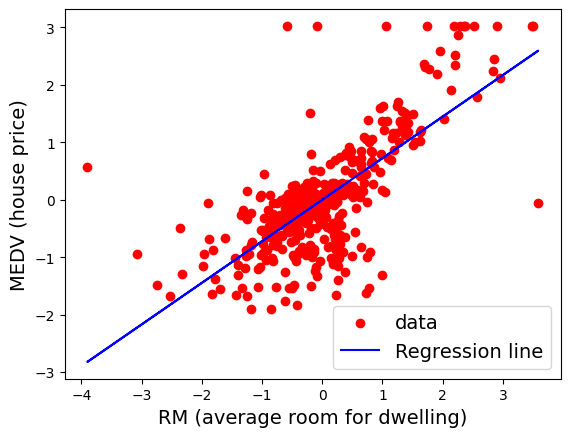

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# I will use the available room for dwelling as the independent variable and the value of the house the dependent
X = housing_standardized.RM
y = housing_standardized.MEDV

# calculate the mean of X and y
X_mean = np.mean(X)
y_mean = np.mean(y)

# calculate m (slope)
m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)

# calculate b (intercept)
b = y_mean - m * X_mean

# Prediction
y_pred = m * X + b

# plot
plt.scatter(X, y, color="red", label="data")
plt.plot(X, y_pred, color="blue", label="Regression line")
plt.xlabel("RM (average room for dwelling)")
plt.ylabel("MEDV (house price)")
plt.legend()
plt.show()



> The linear regression shows that room for dwelling is directly proportional to the price of the house.



#### Perform linear regression using multiple independent variable using statsmodel

In [78]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


X = housing_standardized[["RM", "AGE"]]   # i use RM and AGE as independent variables
X = sm.add_constant(X)
y = housing_standardized.MEDV

# Fit the model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     269.1
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           3.14e-74
Time:                        15:21:18   Log-Likelihood:                -388.52
No. Observations:                 394   AIC:                             783.0
Df Residuals:                     391   BIC:                             795.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.883e-17      0.033  -3.01e-15      1.0



> RM (average room for dwelling) have a positive correlation with the value of a house while Age has a negative correlation with the value of a house



#### Perform linear regression using sklearn

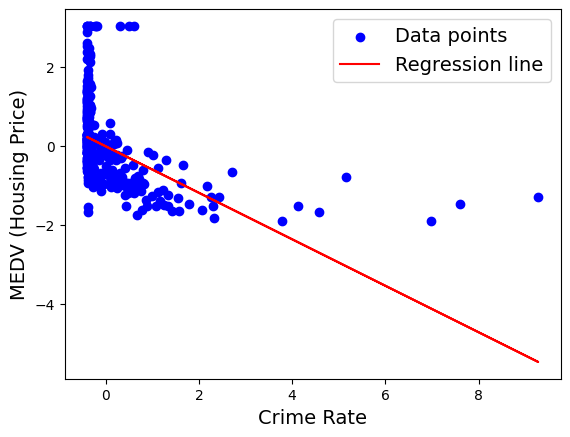

In [79]:
from sklearn.linear_model import LinearRegression

X = housing_standardized[['CRIM']]     # i will now use the crime rate as the independent variable
y = housing_standardized.MEDV

#split the dataset (20% of test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)

#create the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X)


# Plot
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", label="Regression line")
plt.xlabel("Crime Rate")
plt.ylabel("MEDV (Housing Price)")
plt.legend()
plt.show()



> Crime rate alone is not enough to predict the value of the housing price.



### 4.2 Polynomial Regression

* Choose your own dataset
* Import the dataset
* Perform polynomial regression using sklearn and polyfit
* Measure the performance for each polynomial degree.
* Plot the performance of the model for each polynomial degree.

#### Importing dataset

In [80]:
icecream = pd.read_csv('/content/drive/MyDrive/Activity_2_Training_Linear_Models/Ice_cream selling data.csv')
icecream.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


#### Perform polynomial regression using sklearn and polyfit

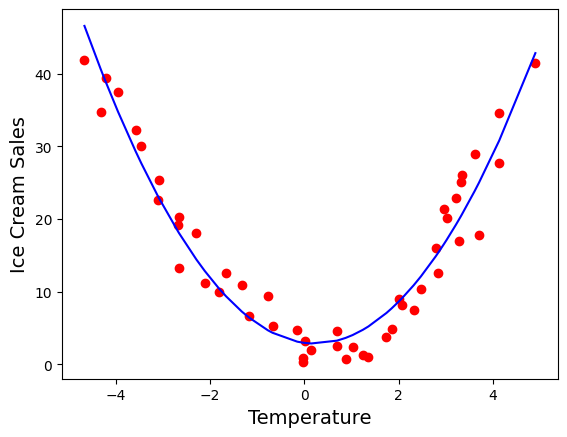

In [81]:
from sklearn.preprocessing import PolynomialFeatures

# must do reshape or else it returns an error
X = icecream['Temperature (°C)'].values.reshape(-1, 1)
y = icecream['Ice Cream Sales (units)'].values

# polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# fitting
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")
plt.show()



> The line graph shows the polynomial relationship of the icecream sales and temperature. My chosen dataset is very unrealistic since the temperature only ranges from -5 degress celsius to 5 degress celsius. It is also weird that there is a high ice cream sales when it reaches -5 degrees celsius. The lowest sales is at 0 - 1 degrees celsisus.



#### Measure the performance for each polynomial degree.

In [82]:
from sklearn.metrics import mean_squared_error

# i used mean squared error to test the performance of each polynomial degree
mse_train, mse_test = [], []
# used a list to test 3 - 5
d = [1, 3, 20]

for i in d:

    # polynomial features
    poly = PolynomialFeatures(degree= i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Evaluate performance
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

def printTest(i):
    for i in range(3):
        print("Degree: ",i+3, mse_train[i])
print('Train')
printTest(mse_train)

print('Test')
printTest(mse_test)

Train
Degree:  3 0.8445859043771995
Degree:  4 0.802868447855458
Degree:  5 0.9558055259988043
Test
Degree:  3 0.8445859043771995
Degree:  4 0.802868447855458
Degree:  5 0.9558055259988043


#### Plot the performance of the model for each polynomial degree.

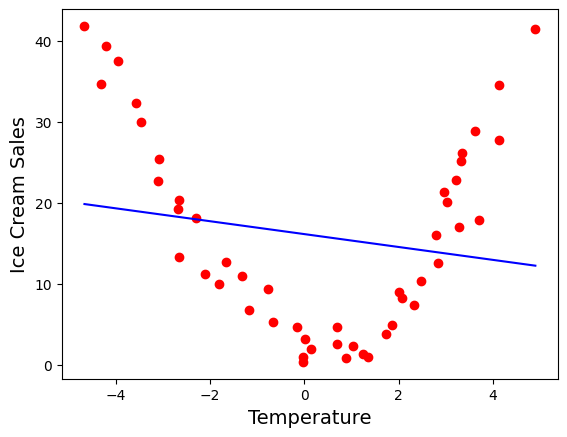

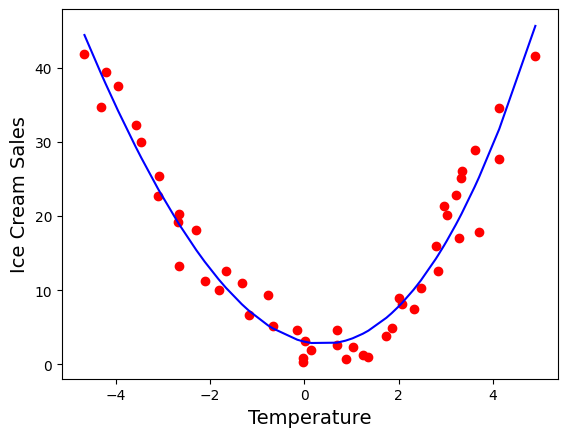

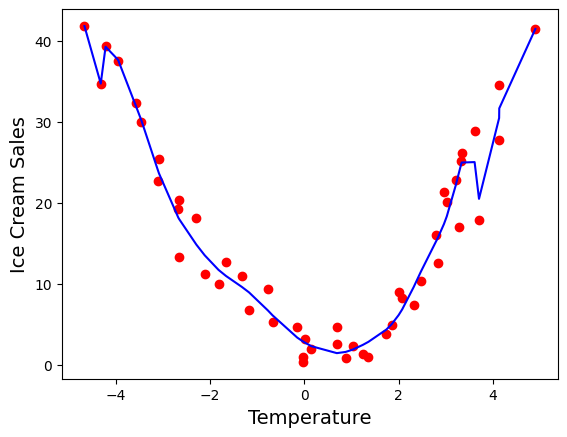

In [83]:
from sklearn.preprocessing import PolynomialFeatures

# must do reshape or else it returns an error
X = icecream['Temperature (°C)'].values.reshape(-1, 1)
y = icecream['Ice Cream Sales (units)'].values

for i in d:
    # polynomial features
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)

    # fitting
    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    # Plot
    plt.scatter(X, y, color='red')
    plt.plot(X, y_pred, color='blue')
    plt.xlabel("Temperature")
    plt.ylabel("Ice Cream Sales")
    plt.show()



> I used the polynomial degrees of 1, 3, and 20 to see the effect of a degree to a polynomial regression. When a degree is too low, it is prone to underfitting. While if it is too high, it is prone to overfitting. There must be a right balance so that the model will generalize the dataset well and not memorized it.



### 4.3 Logistic Regression

* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Solve classification problem using Logistic Regression
* Evaluate the model using classification report, accuracy and confusion matrix

#### Importing the dataset

In [84]:
diabetes = pd.read_csv('/content/drive/MyDrive/Activity_2_Training_Linear_Models/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Determine the number of datapoints, columns and data types

In [85]:
#the number of datapoints
print("Datapoints: ", diabetes.shape[0])

#the column names
print("Column names: ", diabetes.columns.tolist())

#the data types for each column
print(diabetes.dtypes)

Datapoints:  768
Column names:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


#### Data Cleaning

In [86]:
# check for null values
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Data is already cleaned

#### Perform descriptive statistics such as mean, median and mode

In [87]:
# the mean, median and quartiles and ranges

stats_diabetes = diabetes.describe()         #function to see the descriptive statistics of the dataset
stats_diabetes.loc['range'] = stats_diabetes.loc['max'] - stats_diabetes.loc['min']  #create a new column calculating the range

# Select only the 'mean','25%','median','75%', 'range
outputFields = ['mean','25%','50%','75%', 'range']
stats_diabetes = stats_diabetes.loc[outputFields]
stats_diabetes.rename({'50%':'median'}, inplace = True) # rename the 50% to median

stats_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
median,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
range,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.342000,60.000000,1.000000


In [88]:
# mean
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [89]:
# median
diabetes.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,21.0,39.0,30.05,0.336,27.0
1,4.0,140.0,74.0,27.0,0.0,34.25,0.449,36.0


In [90]:
# mode
diabetes.groupby("Outcome").apply(lambda x: x.mode().iloc[0])

/tmp/ipython-input-538310434.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diabetes.groupby("Outcome").apply(lambda x: x.mode().iloc[0])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,,,,,,,,,
0,1.0,99.0,74.0,0.0,0.0,0.0,0.207,22.0,0.0
1,0.0,125.0,70.0,0.0,0.0,32.9,0.254,25.0,1.0


#### Perform Data Visualization

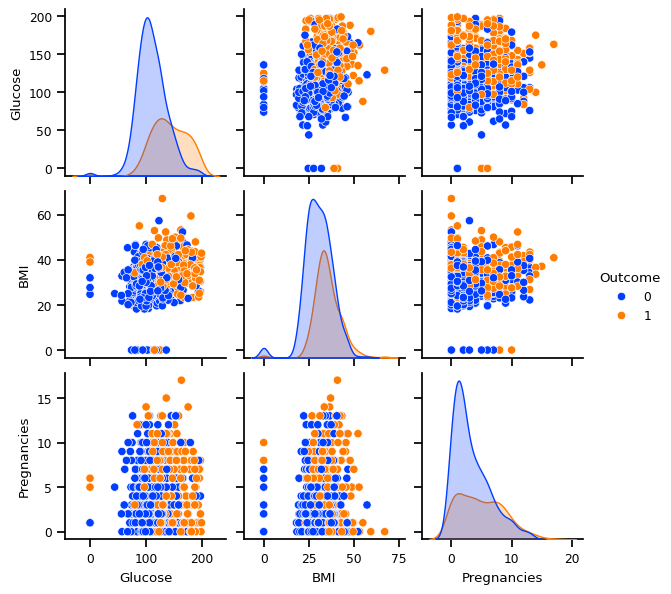

In [91]:
import seaborn as sns
# i only picked some variables since there is a lot
diabetes_picked = diabetes[['Glucose', 'BMI', 'Pregnancies', 'Outcome']]

#pair plot
sns.set_context("notebook", font_scale=0.8)
sns.set_palette("bright")
sns.pairplot(diabetes_picked, hue='Outcome', height=2, aspect=1)

#### Solve classification problem using Logistic Regression

In [92]:
from sklearn.model_selection import train_test_split

X = diabetes.drop(columns = ['Outcome'])
y = diabetes.Outcome

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)

diabetes_model = LogisticRegression(max_iter=200)

diabetes_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [93]:

diabetes_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

#### Evaluate the model using classification report, accuracy and confusion matrix

In [94]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = diabetes_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8116883116883117

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       100
           1       0.77      0.67      0.71        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154





> The model have 83% and 77% accuracy meaning it predicted 83% correctly when it comes to no diabetes while 77% when it come to with diabetes. Recall is basically checking the accuracy of the true positives.


In [95]:
# evaluation of the model using score accuracy
diabetes_model.score(X_test, y_test)

0.8116883116883117



> 81.17% accuracy, decent but not good enough



In [96]:
# using confusion matrix display


cm = confusion_matrix(y_test, y_pred)
cm

array([[89, 11],
       [18, 36]])

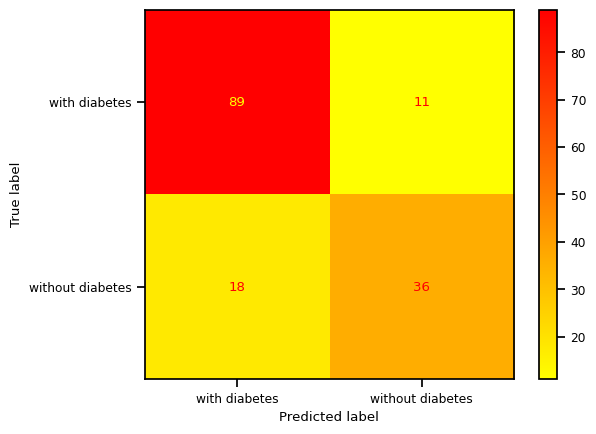

In [97]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['with diabetes', 'without diabetes'])
cm_plot.plot(cmap='autumn_r')



> As we can see from the confusion matrix, the model predicted correclty most of the time. There are fewer errors compared to the correct answers. The data shows that the majority is in the TRUE positive region meaning there are a lot of predictions that someone with diabetes is actually true.



## 5. Summary, Conclusions and Lessons Learned

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*

***Disclaimer***

*Contents of this Notebook are based on Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow 3rd Edition by Aurelien Geron.*
*A copy of the complete text can be obtained here: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/*